In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [57]:
#Read the data
cars = pd.read_csv(r"C:\Users\CHARAN\Downloads\50_Startups (1).csv")
cars.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [58]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [59]:
df=cars.drop('State', axis = 1)

In [60]:
#check for missing values
cars.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [77]:
df['rd']=df['R&D Spend']
df['mp']=df['Marketing Spend']
df1= df.drop('R&D Spend', axis = 1)
df2= df1.drop('Marketing Spend', axis = 1)

df2

,Administration,Profit,rd,mp
0,136897.80,192261.83,165349.20,471784.10
1,151377.59,191792.06,162597.70,443898.53
2,101145.55,191050.39,153441.51,407934.54
3,118671.85,182901.99,144372.41,383199.62
4,91391.77,166187.94,142107.34,366168.42
5,99814.71,156991.12,131876.90,362861.36
6,147198.87,156122.51,134615.46,127716.82
7,145530.06,155752.60,130298.13,323876.68
8,148718.95,152211.77,120542.52,311613.29
9,108679.17,149759.96,123334.88,304981.62


# Correlation Matrix

In [78]:
df2.corr()

,Administration,Profit,rd,mp
Administration,1.000000,0.200717,0.241955,-0.032154
Profit,0.200717,1.000000,0.972900,0.747766
rd,0.241955,0.972900,1.000000,0.724248
mp,-0.032154,0.747766,0.724248,1.000000


# Scatterplot between variables along with histograms

C:\Users\CHARAN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


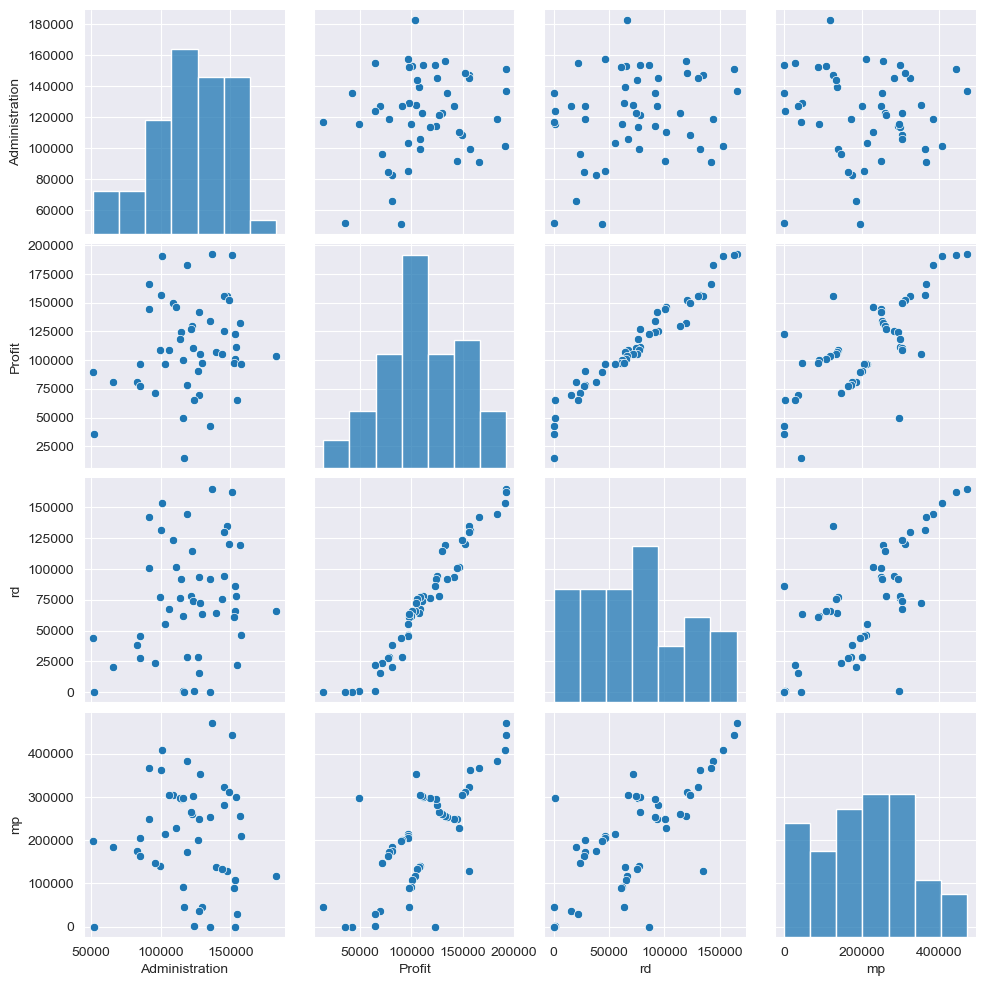

In [80]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df2)

# Preparing a model

In [81]:
import statsmodels.formula.api as smf
model =smf.ols("Profit~mp+rd+Administration",data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           4.53e-30
Time:                        17:37:36   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
mp                 0.0272      0.016      1.655      0.105      -0.006       0.060
rd                 0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
#Coefficients
model.params

Intercept         50122.192990
mp                    0.027228
rd                    0.805715
Administration       -0.026816
dtype: float64

In [83]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
mp                 1.655077
rd                17.846374
Administration    -0.525507
dtype: float64 
 Intercept         1.057379e-09
mp                1.047168e-01
rd                2.634968e-22
Administration    6.017551e-01
dtype: float64


In [84]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [86]:
df2.columns

Index(['Administration', 'Profit', 'rd', 'mp'], dtype='object')

# Simple Linear Regression Models

In [91]:
ml_v=smf.ols('Profit~Administration',data = df2).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [92]:
ml_w=smf.ols('Profit~rd',data = df2).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    19.320288
rd           29.151139
dtype: float64 
 Intercept    2.782697e-24
rd           3.500322e-32
dtype: float64


In [93]:
ml_wv=smf.ols('Profit~mp',data = df2).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  

Intercept    7.808356
mp           7.802657
dtype: float64 
 Intercept    4.294735e-10
mp           4.381073e-10
dtype: float64


# Calculating VIF

In [112]:
rsq_hp = smf.ols("Profit~mp+rd+Administration",data=df2).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 
rsq_vol = smf.ols('rd~mp+Profit+Administration',data=df2).fit().rsquared  
vif_vol = 1/(1-rsq_vol) 

rsq_sp = smf.ols('Administration~rd+mp+Profit',data=df2).fit().rsquared  
vif_sp = 1/(1-rsq_sp) 
 
rsq_wt = smf.ols('mp~Administration+rd+Profit',data=df2).fit().rsquared  
vif_wt = 1/(1-rsq_wt)



# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

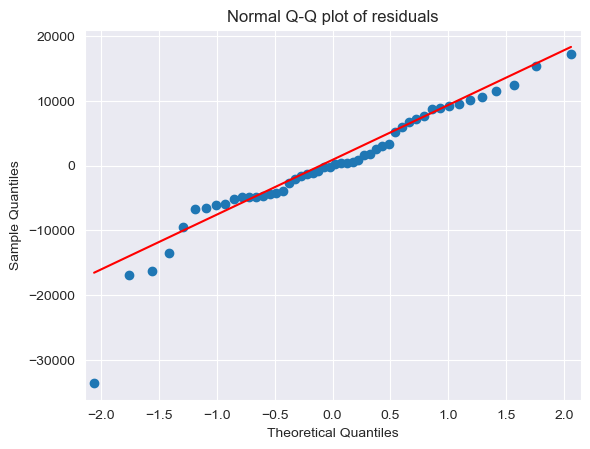

In [113]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [114]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

## Residual Plot for Homoscedasticity

In [115]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

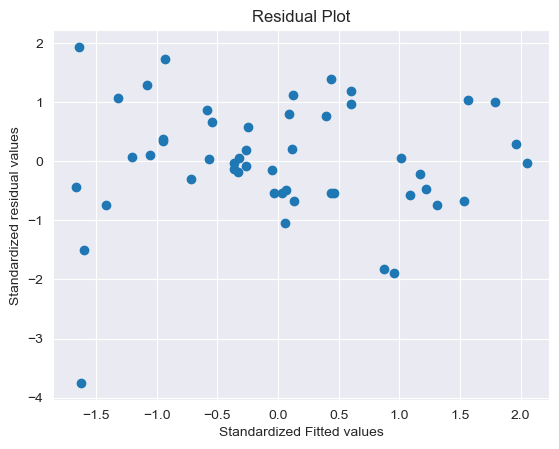

In [116]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [119]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

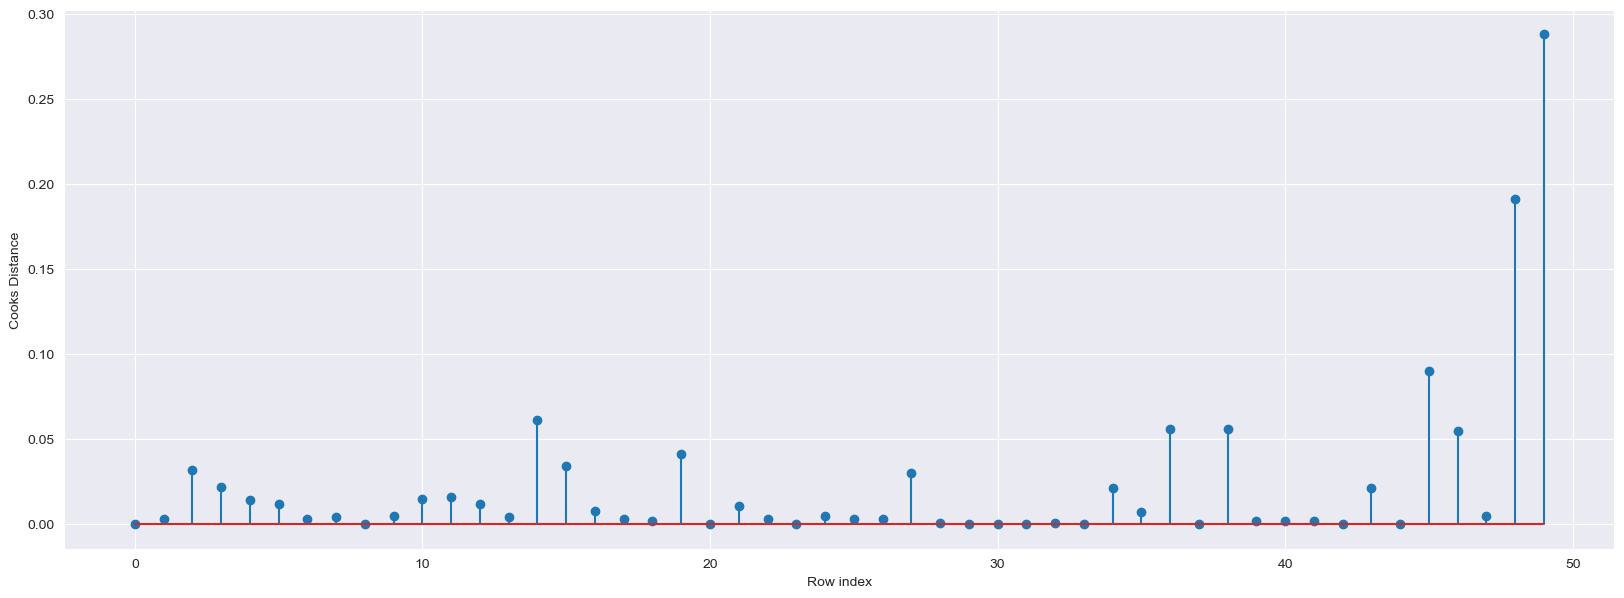

In [120]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [121]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543274)

## High Influence points

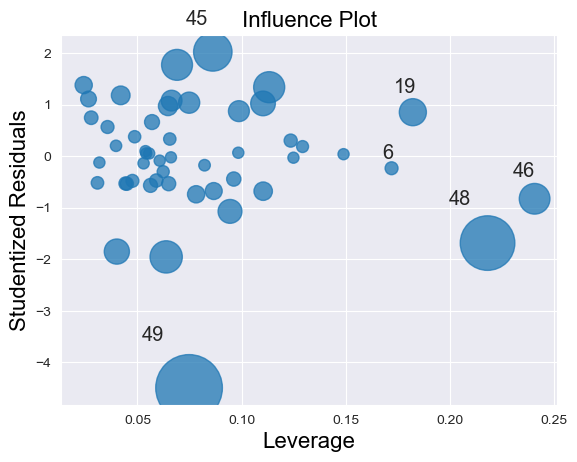

In [122]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [123]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)

#### From the above plot, it is evident that data point 70 and 76 are the influencers

In [126]:
df2[df2.index.isin([70, 76])]

,Administration,Profit,rd,mp


In [128]:
#See the differences in HP and other variable values
df2.head()

,Administration,Profit,rd,mp
0,136897.80,192261.83,165349.20,471784.10
1,151377.59,191792.06,162597.70,443898.53
2,101145.55,191050.39,153441.51,407934.54
3,118671.85,182901.99,144372.41,383199.62
4,91391.77,166187.94,142107.34,366168.42


In [131]:
model.predict(df2)

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [133]:
model.predict(df2.iloc[0:5,])

0    192521.252890
1    189156.768232
2    182147.279096
3    173696.700026
4    172139.514183
dtype: float64

In [136]:
pred_y = model.predict(df2)

In [137]:
pred_y

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111
